In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [15]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

We can see from the information about the dataset that we don't have any issues with data types. However, we are seeing missing values within the columns `Parental_Education_Level` and `'Distance_from_Home`. We could look at the data entries within those fields to see which values are missing, but since these values represent a really small portion of the dataset, we can choose to exempt them entirely.

In [5]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


### Insights

Looking at the summary statistics of the dataset, we can see that `Exam_Score` has a maximum value of 101, which is not possible since our exam scores are in percentages and cannot be greater than 100. This will need to be cleaned.

Comparing the mean of `Previous_Scores` to `Exam_Score`, we can see that, on average, there was a drop in performance on the previous and current exam scores, from 75 to 67. It could be interesting to pull up insights to see how the values correlate together and if there is a relationship between them."

# Data Cleaning

In [16]:
# Identify rows where 'Exam_Score' exceeds 100 to check for invalid entries
invalid_scores_count = df[df['Exam_Score'] > 100].shape

In [17]:
# Get the index of the first row where 'Exam_Score' exceeds 100
index_val = df[df['Exam_Score'] > 100].index[0]

# Cap the 'Exam_Score' at 100 for the identified row
df.loc[index_val, 'Exam_Score'] = 100

In [18]:
df[df['Exam_Score'] > 100] # No more rows greater than 100

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [19]:
# drop null values
df = df.dropna()

# Data Visualisation

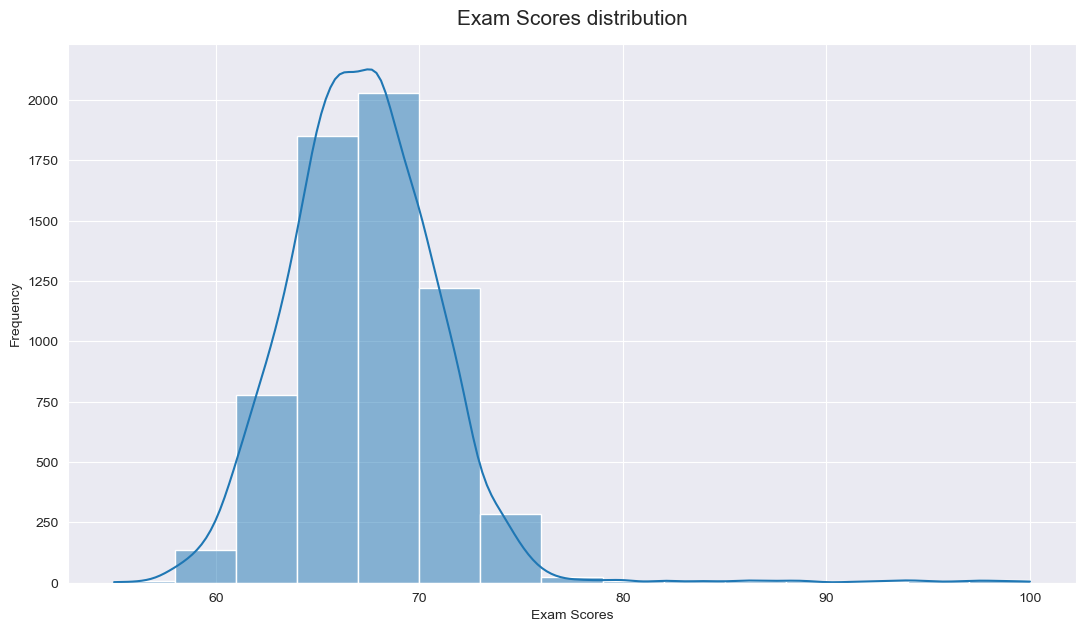

In [11]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.histplot(df.Exam_Score, kde = True, bins = 15)
plt.title('Exam Scores distribution', y = 1.02, fontsize = 15)
plt.xlabel('Exam Scores')
plt.ylabel('Frequency')
plt.show()

The frequency distribution plot is expected to take a bell shape, implying a normally distributed population. This is the kind of trend we would like to see with regards to the exam scores. However, the trend may also show outliers, particularly among students who scored high in the exam, from grades 80 to 100.

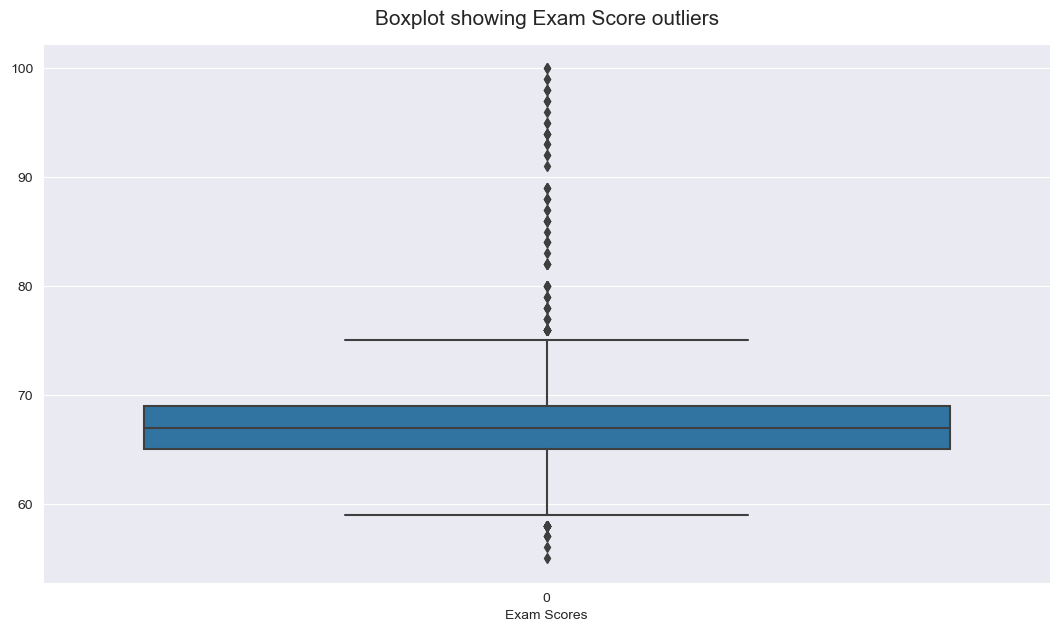

In [12]:
# Plotting boxplot for speed average
sns.set_style('darkgrid')
plt.figure(figsize = (13, 7))
sns.boxplot(df.Exam_Score)
plt.title('Boxplot showing Exam Score outliers', y = 1.02, fontsize = 15)
plt.xlabel('Exam Scores')
plt.show()

The box plot clearly shows that the outliers for the higher grades start from the 75 mark and extend all the way to 100.

c:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


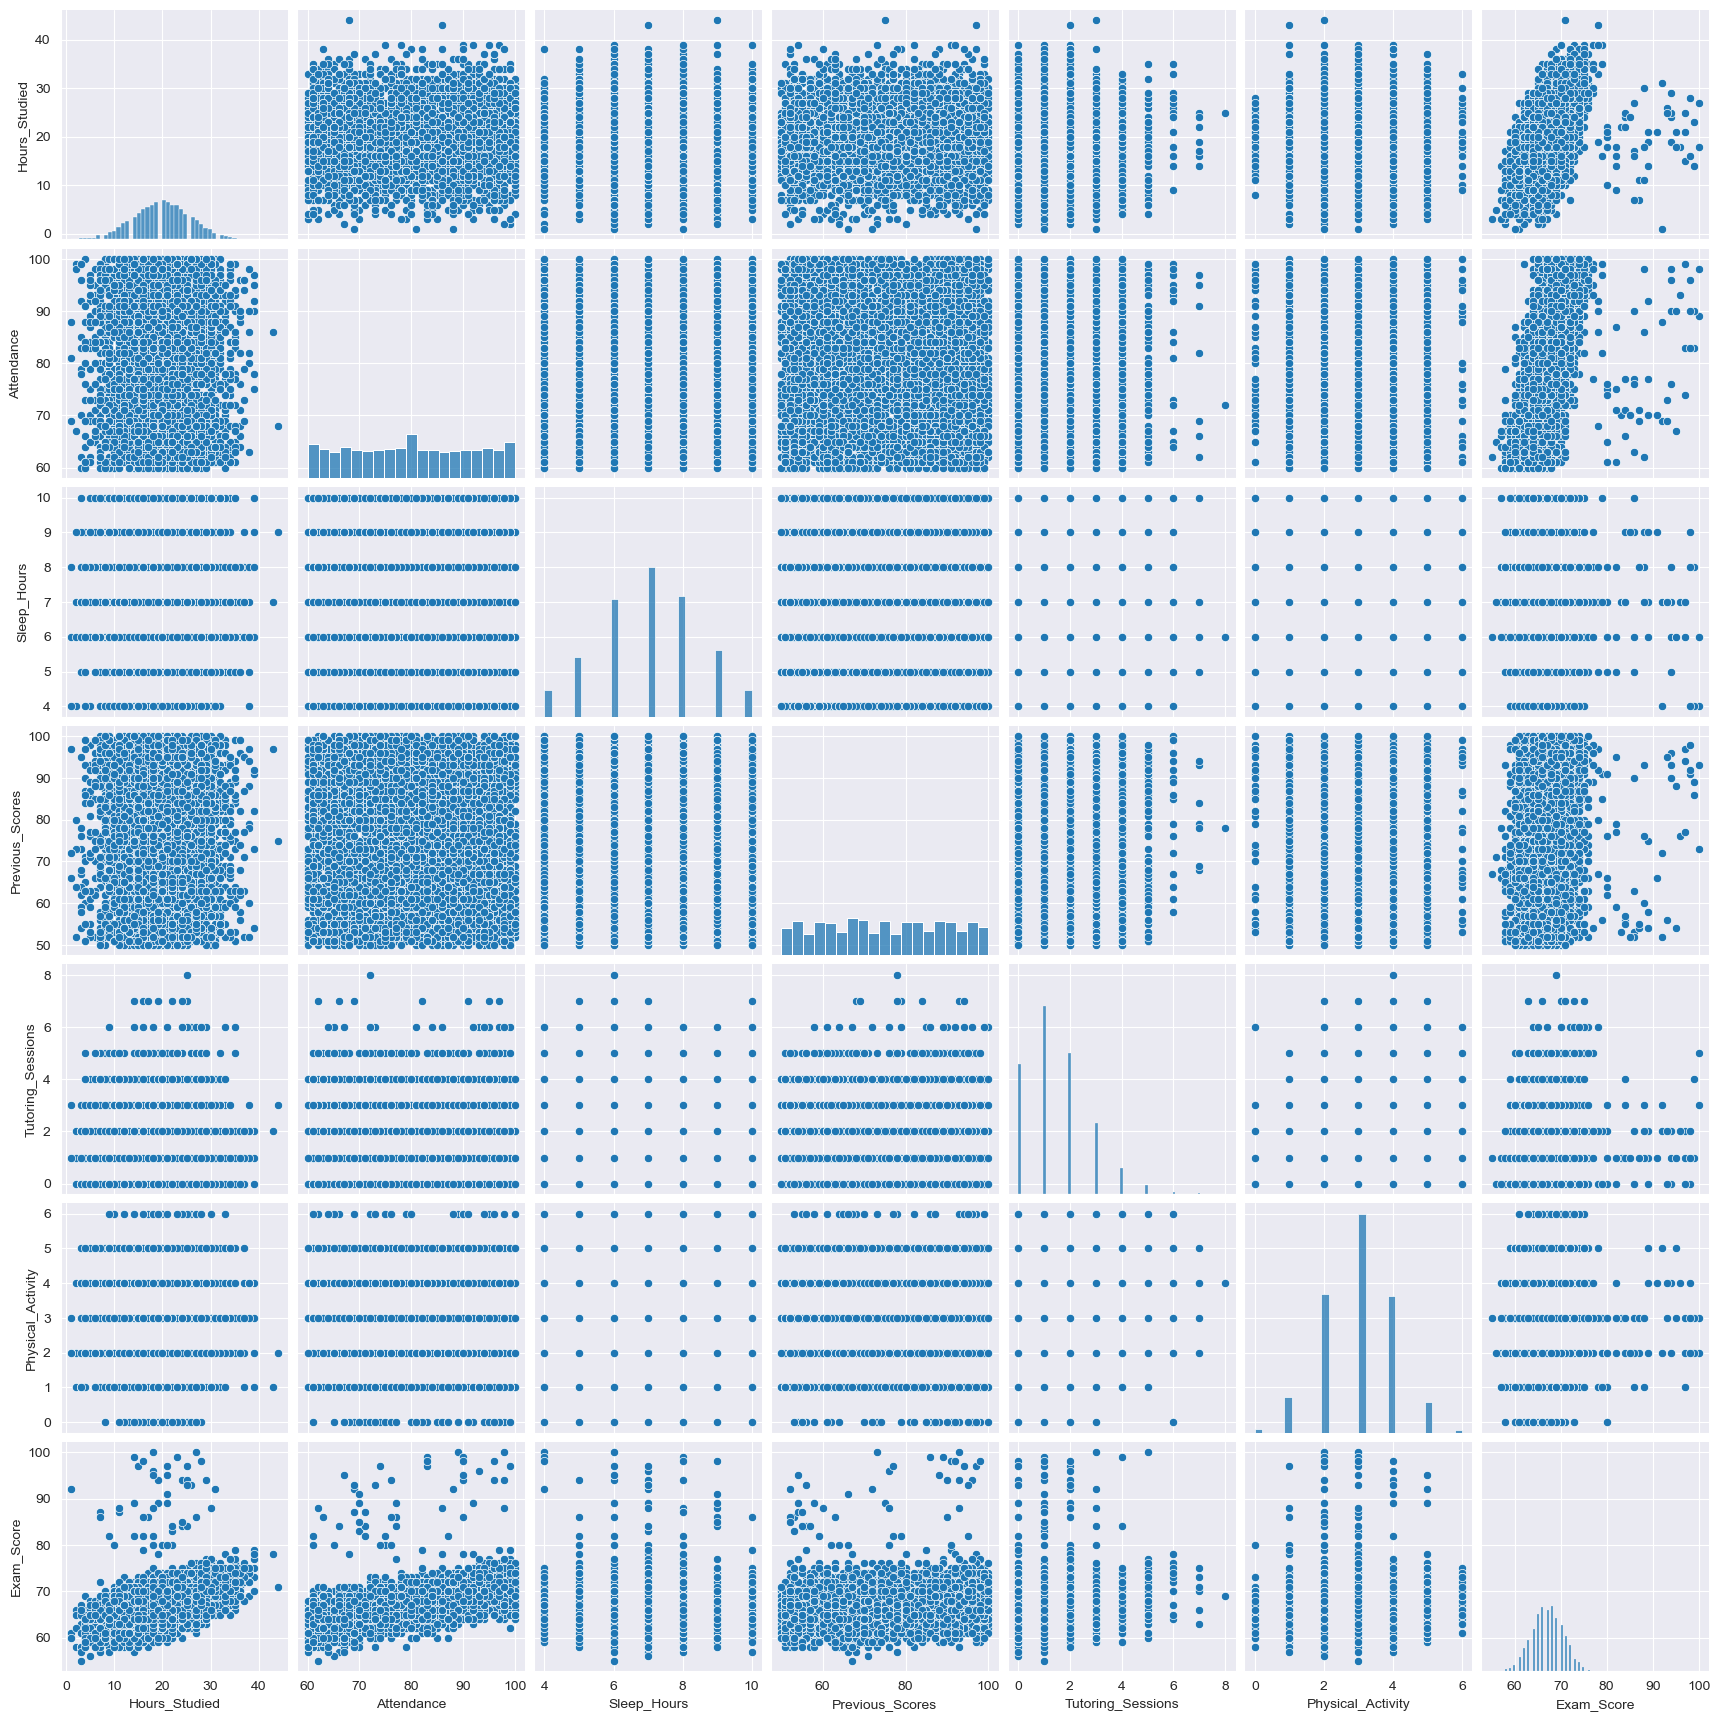

In [13]:
# Generate pairwise scatterplots and histograms for numerical columns in the dataset
sns.pairplot(df)

The pair plot shows that there are not really any strong correlations between variables. Even between the target variable `Exam_Score` and the predictor variables, we can see that they are not strongly correlated. From a first glance, we can see that the strongest correlation, which is positive, is between `Exam_Score` and `Hours_Studied`.

In [14]:
# Calculate the percentage of students scoring above the upper quartile (69)
above_upper_quartile = df[df['Exam_Score'] > 69]['Exam_Score'].count() / df['Exam_Score'].count()

# Calculate the percentage of students scoring below the lower quartile (65)
below_lower_quartile = df[df['Exam_Score'] < 65]['Exam_Score'].count() / df['Exam_Score'].count()

# Print the calculated percentages with two decimal precision
print(f"The percentage of students above the upper quartile is {round(above_upper_quartile * 100, 2)}%")
print(f"The percentage of students below the lower quartile is {round(below_lower_quartile * 100, 2)}%")


The percentage of students above the upper quartile is 24.79%
The percentage of students below the lower quartile is 21.89%


In [15]:
# Compute the correlation matrix for the selected predictor variables
correlation_matrix = df[["Hours_Studied", "Attendance", "Sleep_Hours", 
                         "Previous_Scores", "Tutoring_Sessions", "Physical_Activity"]].corr()

# Display the correlation matrix
correlation_matrix

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
Hours_Studied,1.000000,-0.004997,0.013119,0.022492,-0.009654,0.003183
Attendance,-0.004997,1.000000,-0.019602,-0.018083,0.012070,-0.022976
Sleep_Hours,0.013119,-0.019602,1.000000,-0.023238,-0.011466,-0.002898
Previous_Scores,0.022492,-0.018083,-0.023238,1.000000,-0.013158,-0.006694
Tutoring_Sessions,-0.009654,0.012070,-0.011466,-0.013158,1.000000,0.016325
Physical_Activity,0.003183,-0.022976,-0.002898,-0.006694,0.016325,1.000000


# Data Preprocessing

In [20]:
# Creating dummy variables for categorical columns and converting them into numeric format
df_dummies = pd.get_dummies(df, drop_first = True, dtype = 'int')
df_dummies.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
0,23,84,7,73,0,3,67,1,0,0,...,1,1,0,1,0,1,0,0,1,1
1,19,64,8,59,2,4,61,1,0,0,...,1,1,0,0,0,0,0,1,0,0
2,24,98,7,91,2,4,74,0,1,0,...,1,1,1,0,0,0,1,0,1,1
3,29,89,8,98,1,4,71,1,0,0,...,1,1,0,0,0,1,0,1,0,1
4,19,92,6,65,3,4,70,0,1,0,...,0,1,1,0,0,0,0,0,1,0


In [17]:
# Splitting data into features (X) and target (y)
# X contains all features, y contains the target (Exam_Score)

X = df_dummies.drop(columns=['Exam_Score'])  # Drop 'Exam_Score' from features
y = df_dummies['Exam_Score']  # Set 'Exam_Score' as the target

# Unscaled Model - ML Fitting

In [18]:
# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Displaying the shapes of the training and testing sets for features and target variable
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (5102, 27)
y_train shape: (5102,)
X_test shape: (1276, 27)
y_test shape: (1276,)


In [20]:
# Defining a list of models with names, instances, and notes
RANDOM_STATE = 42

model_list = [{'model name':'Linear Regression',
              'model':linear_model.LinearRegression(),
              'notes':'Simple Linear Regression'},
              {'model name':'Lasso Regression Model',
              'model':linear_model.Lasso(alpha=0.05),
              'notes':'Lasso Regression with Alpha(0.05)'},
              {'model name':'Ridge Regression Model',
              'model':linear_model.Ridge(),
              'notes':'Ridge Regression Model'},
              {'model name':'Random Forest',
              'model':RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE),
              'notes':'Random Forest with 100 Estimators'}]

In [21]:
def pre_model_building(model, X_train, y_train, X_test, y_test):
    # Fit the model with training data
    r_m = model
    r_m.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = r_m.predict(X_test)
    
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    r2 = r2_score(y_test, y_pred)  # R-squared
    
    return mae, mse, rmse, r2  # Return all metrics

In [22]:
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

for model in model_list:
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

model_metrics_df = pd.DataFrame({'model_name':model_name_list,
                                 'r2_score':r2_list,
                                 'rmse':rmse_list,
                                 'mae':mae_list,
                                 'mse':mse_list,
                                 'notes':notes_list})# Initialize lists to store model performance metrics
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

# Loop through each model and calculate its metrics
for model in model_list:
    # Get metrics for the current model
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    
    # Append the results to the corresponding lists
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

# Create a DataFrame to display model performance metrics
model_metrics_df = pd.DataFrame({'model_name': model_name_list,
                                 'r2_score': r2_list,
                                 'rmse': rmse_list,
                                 'mae': mae_list,
                                 'mse': mse_list,
                                 'notes': notes_list})

In [23]:
# Display the DataFrame with the model metrics
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.731434,2.042874,0.487132,4.173336,Simple Linear Regression
1,Lasso Regression Model,0.708211,2.129368,0.768792,4.534209,Lasso Regression with Alpha(0.05)
2,Ridge Regression Model,0.731451,2.042807,0.487063,4.173062,Ridge Regression Model
3,Random Forest,0.610951,2.458771,1.245752,6.045557,Random Forest with 100 Estimators


### Insights

Best Fit: Ridge Regression Model (0.731451)

Lowest RMSE: Ridge Regression Model (2.042807)

Lowest MAE: Ridge Regression Model (0.487063)

Lowest MSE: Ridge Regression Model (4.173062)

The <b>Ridge Regression Model</b> outperformed all the models with the <b>Linear Regression	</b> coming in closely second and the <b>Random Forest Model </b> performing terribly 

## Model Building (Linear Regression) - Variable Evaluation

In [24]:
lr = linear_model.LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
for i, column in enumerate(X.columns):
    print(f"{column} : {round(lr.coef_[i], 4)}")

Hours_Studied : 0.2958
Attendance : 0.1987
Sleep_Hours : -0.0127
Previous_Scores : 0.0485
Tutoring_Sessions : 0.4823
Physical_Activity : 0.2002
Parental_Involvement_Low : -2.0133
Parental_Involvement_Medium : -1.0385
Access_to_Resources_Low : -2.0504
Access_to_Resources_Medium : -1.0113
Extracurricular_Activities_Yes : 0.5664
Motivation_Level_Low : -1.108
Motivation_Level_Medium : -0.5989
Internet_Access_Yes : 0.9032
Family_Income_Low : -1.1475
Family_Income_Medium : -0.6199
Teacher_Quality_Low : -1.0499
Teacher_Quality_Medium : -0.6055
School_Type_Public : 0.0487
Peer_Influence_Neutral : 0.5619
Peer_Influence_Positive : 1.0144
Learning_Disabilities_Yes : -0.8703
Parental_Education_Level_High School : -0.4767
Parental_Education_Level_Postgraduate : 0.5216
Distance_from_Home_Moderate : 0.3044
Distance_from_Home_Near : 0.8419
Gender_Male : -0.0104


In [26]:
c = lr.intercept_
print(f"Intercept: {c}")

Intercept: 42.050571723999326


# Scaled Model

In [27]:
# Initialize the StandardScaler for feature scaling
scaler = StandardScaler()

# Fit the scaler to the data (X) and transform it, standardizing the features (mean = 0, std = 1)
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% for training, 20% for testing)
# X_scaled is the standardized features, and y is the target variable (Exam_Score)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [28]:
# Initialize empty lists to store model evaluation metrics and details
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

# Loop through each model in the 'model_list' and evaluate its performance
for model in model_list:
    # Get the evaluation metrics (MAE, MSE, RMSE, R2) for each model by calling pre_model_building function
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    
    # Append the metrics and model details to their respective lists
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

# Create a DataFrame from the lists, which will contain the model metrics and notes
model_metrics_df = pd.DataFrame({'model_name':model_name_list,
                                 'r2_score':r2_list,
                                 'rmse':rmse_list,
                                 'mae':mae_list,
                                 'mse':mse_list,
                                 'notes':notes_list})


In [29]:
# Display the DataFrame with the model metrics
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.731434,2.042874,0.487132,4.173336,Simple Linear Regression
1,Lasso Regression Model,0.726967,2.059792,0.568731,4.242741,Lasso Regression with Alpha(0.05)
2,Ridge Regression Model,0.731438,2.042860,0.487138,4.173277,Ridge Regression Model
3,Random Forest,0.611831,2.455991,1.245353,6.031890,Random Forest with 100 Estimators


# Variable Selection

c:\Users\Hp\anaconda3\Lib\site-packages\statsmodels\graphics\correlation.py:112: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


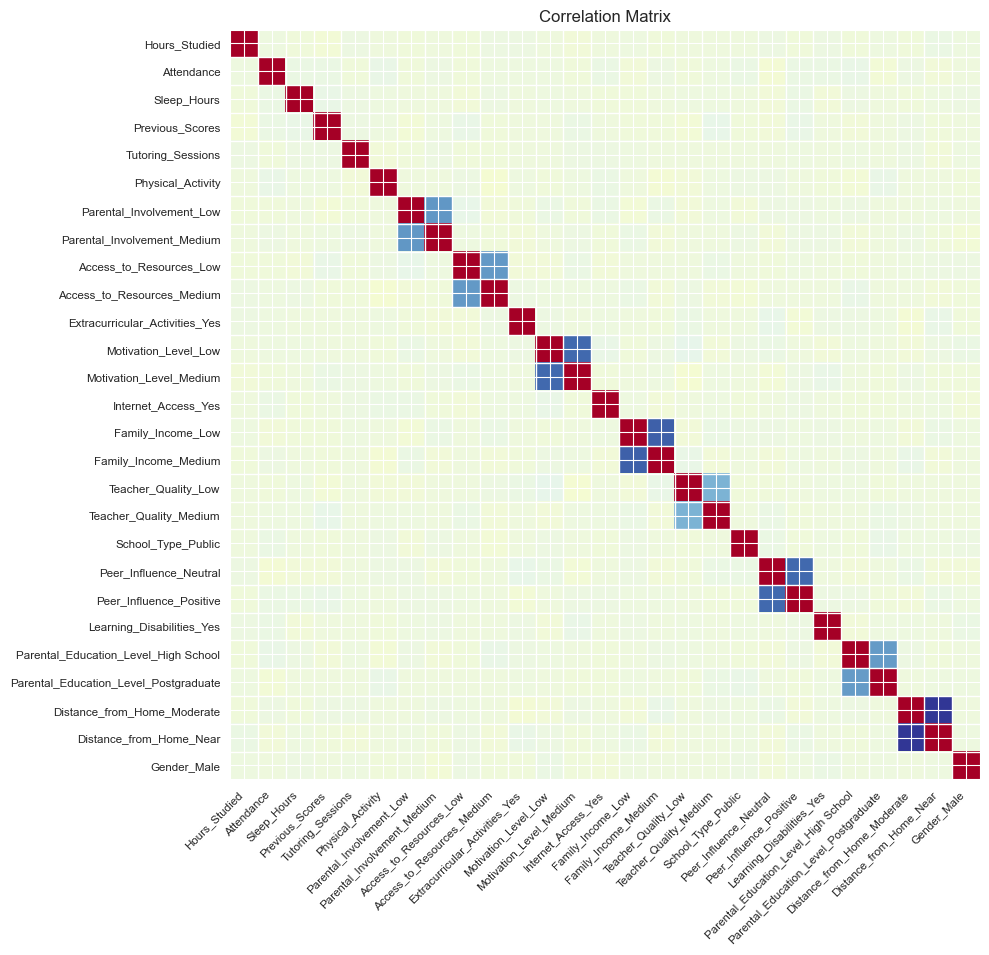

<Figure size 1000x1000 with 0 Axes>

In [48]:
# Importing the function to plot the correlation matrix from statsmodels
from statsmodels.graphics.correlation import plot_corr

# Create a new figure with a specific size for the correlation plot
fig = plt.figure(figsize=(10,10))

# Plot the correlation matrix (excluding 'Exam_Score') using the plot_corr function
# The xnames argument sets the labels for the columns in the correlation matrix
plot_corr(df_dummies.drop(columns=['Exam_Score']).corr(), 
          xnames = df_dummies.drop(columns=['Exam_Score']).corr().columns, 
          ax = ax)

In [31]:
# Dropping the 'Exam_Score' column and calculating the correlation of the remaining features
# with the 'Motivation_Level_Medium' column. The result is sorted to show correlations in ascending order.
df_dummies.drop(columns=['Exam_Score']).corr()['Motivation_Level_Medium'].sort_values()

Motivation_Level_Low                    -0.652348
Learning_Disabilities_Yes               -0.021536
Previous_Scores                         -0.019475
Access_to_Resources_Low                 -0.016149
Distance_from_Home_Moderate             -0.010297
Tutoring_Sessions                       -0.009982
Peer_Influence_Positive                 -0.008778
Parental_Involvement_Medium             -0.008762
Physical_Activity                       -0.006917
Teacher_Quality_Medium                  -0.004349
Family_Income_Medium                    -0.002757
Access_to_Resources_Medium              -0.000698
Extracurricular_Activities_Yes           0.000543
School_Type_Public                       0.001111
Sleep_Hours                              0.003380
Family_Income_Low                        0.003558
Parental_Education_Level_High School     0.004846
Parental_Involvement_Low                 0.007637
Gender_Male                              0.007776
Distance_from_Home_Near                  0.009519


In [21]:
# Calculate correlations between predictor variables and the response variable
corrs = df_dummies.corr()['Exam_Score'].sort_values(ascending=False)
corrs

Exam_Score                               1.000000
Attendance                               0.580394
Hours_Studied                            0.445209
Previous_Scores                          0.174292
Tutoring_Sessions                        0.156769
Parental_Education_Level_Postgraduate    0.092298
Distance_from_Home_Near                  0.081280
Peer_Influence_Positive                  0.080214
Extracurricular_Activities_Yes           0.063051
Internet_Access_Yes                      0.051281
Physical_Activity                        0.025155
Family_Income_Medium                     0.024963
Motivation_Level_Medium                  0.022556
Gender_Male                             -0.004887
Peer_Influence_Neutral                  -0.007443
School_Type_Public                      -0.010898
Sleep_Hours                             -0.017149
Access_to_Resources_Medium              -0.024628
Parental_Involvement_Medium             -0.036162
Teacher_Quality_Low                     -0.040883


In [22]:
from scipy.stats import pearsonr

# Build a dictionary of correlation coefficients and p-values
p_val_list = []  # List to store p-values for each feature

# Get the list of feature names excluding 'Exam_Score'
column_titles = [col for col in corrs.index if col != 'Exam_Score']

# Loop through each feature to calculate the Pearson correlation coefficient and p-value
for col in column_titles:
    # Pearson correlation test between the feature and 'Exam_Score'
    p_val = round(pearsonr(df_dummies[col], df_dummies['Exam_Score'])[1], 6)
    # Append the p-value to the list
    p_val_list.append(p_val)

# Create a DataFrame containing the variable names, correlation coefficients, and p-values
df_p_val = pd.DataFrame({
    'Variable_Name': list(corrs.index)[1:],  # Excluding 'Exam_Score' from the variable names
    'Correlation_Coefficient': list(corrs.values)[1:],  # Corresponding correlation coefficients
    'P_Value': p_val_list  # List of p-values for each feature
})

In [23]:
df_p_val

,Variable_Name,Correlation_Coefficient,P_Value
0,Attendance,0.580394,0.000000
1,Hours_Studied,0.445209,0.000000
2,Previous_Scores,0.174292,0.000000
3,Tutoring_Sessions,0.156769,0.000000
4,Parental_Education_Level_Postgraduate,0.092298,0.000000
5,Distance_from_Home_Near,0.081280,0.000000
6,Peer_Influence_Positive,0.080214,0.000000
7,Extracurricular_Activities_Yes,0.063051,0.000000
8,Internet_Access_Yes,0.051281,0.000042
9,Physical_Activity,0.025155,0.044550


If we were to use a logic test with a significance value of 5% (**p-value < 0.05**), we could infer that the following features are statistically significant

In [24]:
# Sort the DataFrame by the P-Value column in ascending order
df_p_val_sorted = df_p_val.sort_values('P_Value')

# Filter and display rows where the P-Value is less than 0.05 (statistically significant correlations)
df_p_val_sorted[df_p_val_sorted['P_Value'] < 0.05]

,Variable_Name,Correlation_Coefficient,P_Value
0,Attendance,0.580394,0.000000
24,Parental_Education_Level_High School,-0.090484,0.000000
23,Family_Income_Low,-0.084052,0.000000
22,Learning_Disabilities_Yes,-0.083926,0.000000
21,Motivation_Level_Low,-0.080151,0.000000
25,Parental_Involvement_Low,-0.112528,0.000000
7,Extracurricular_Activities_Yes,0.063051,0.000000
26,Access_to_Resources_Low,-0.131301,0.000000
1,Hours_Studied,0.445209,0.000000
2,Previous_Scores,0.174292,0.000000


In [25]:
# Extract the names of variables with statistically significant correlations (P-Value < 0.05)
df_p_val[df_p_val['P_Value'] < 0.05]['Variable_Name'].values

array(['Attendance', 'Hours_Studied', 'Previous_Scores',
       'Tutoring_Sessions', 'Parental_Education_Level_Postgraduate',
       'Distance_from_Home_Near', 'Peer_Influence_Positive',
       'Extracurricular_Activities_Yes', 'Internet_Access_Yes',
       'Physical_Activity', 'Family_Income_Medium',
       'Access_to_Resources_Medium', 'Parental_Involvement_Medium',
       'Teacher_Quality_Low', 'Teacher_Quality_Medium',
       'Distance_from_Home_Moderate', 'Motivation_Level_Low',
       'Learning_Disabilities_Yes', 'Family_Income_Low',
       'Parental_Education_Level_High School', 'Parental_Involvement_Low',
       'Access_to_Resources_Low'], dtype=object)

In [37]:
# The dependent variable remains the same:
y_name = 'Exam_Score'
y = df_dummies[y_name]

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_p_val[df_p_val['P_Value'] < 0.05]['Variable_Name'].values)
X = df_dummies[X_names]

X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [38]:
# Initialize empty lists to store model evaluation metrics
model_name_list = []
mae_list = []
mse_list = []
rmse_list = []
r2_list = []
notes_list = []

# Iterate through each model in the model_list to calculate and store evaluation metrics
for model in model_list:
    # Call the pre_model_building function to get model performance metrics
    mae_value, mse_value, rmse_value, r2_value = pre_model_building(model['model'], X_train, y_train, X_test, y_test)
    
    # Append the model name and corresponding metrics to the lists
    model_name_list.append(model['model name'])
    mae_list.append(mae_value)
    mse_list.append(mse_value)
    rmse_list.append(rmse_value)
    r2_list.append(r2_value)
    notes_list.append(model['notes'])

# Create a DataFrame to store the results of all models and their evaluation metrics
model_metrics_df = pd.DataFrame({
    'model_name': model_name_list,
    'r2_score': r2_list,
    'rmse': rmse_list,
    'mae': mae_list,
    'mse': mse_list,
    'notes': notes_list
})

In [39]:
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.730480,2.046497,0.544610,4.188151,Simple Linear Regression
1,Lasso Regression Model,0.724714,2.068276,0.613751,4.277765,Lasso Regression with Alpha(0.05)
2,Ridge Regression Model,0.730478,2.046505,0.544670,4.188184,Ridge Regression Model
3,Random Forest,0.622423,2.422250,1.203174,5.867293,Random Forest with 100 Estimators


In [40]:
def train_rf_model(data, target_variable, n_estimators, m_depth):

    # Splitting the dataset into features and target variable
    X = data.drop(columns=[target_variable])  # Features
    y = data[target_variable]  # Target variable

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initializing the RandomForestRegressor with n_estimators
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=m_depth, random_state=42)

    # Training the model on the training set
    rf_model.fit(X_train, y_train)

    # Making predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Evaluating the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Return the trained model and its performance metrics
    return rf_model, {'RMSE': rmse, 'R2': r2}


In [41]:
# Number of estimators to evaluate
estimators_list = [50, 100, 200]
max_depth_list = [1, 2, 3, 4]

# Dictionary to store results
results = {}

# Train and evaluate models with different numbers of estimators
for n in estimators_list:
    for m in max_depth_list:
        # Store the entire returned dictionary as the value for each key
        model, metric = train_rf_model(df_dummies, 'Exam_Score', n_estimators=n, m_depth=m)
        results[f"{n} trees, max depth - {m}"] = metric
    
results

{'50 trees, max depth - 1': {'RMSE': 3.3307816072534835,
  'R2': 0.2860625461843376},
 '50 trees, max depth - 2': {'RMSE': 2.964772183811113,
  'R2': 0.43434646554690604},
 '50 trees, max depth - 3': {'RMSE': 2.8094206493999057,
  'R2': 0.49207289300608903},
 '50 trees, max depth - 4': {'RMSE': 2.676285478081834,
  'R2': 0.5390723878808561},
 '100 trees, max depth - 1': {'RMSE': 3.332520841325622,
  'R2': 0.285316758149063},
 '100 trees, max depth - 2': {'RMSE': 2.969115438322647,
  'R2': 0.43268793892445867},
 '100 trees, max depth - 3': {'RMSE': 2.810899558302885,
  'R2': 0.4915379957953201},
 '100 trees, max depth - 4': {'RMSE': 2.67508187872999,
  'R2': 0.5394868783614617},
 '200 trees, max depth - 1': {'RMSE': 3.328159756617646,
  'R2': 0.28718606665022006},
 '200 trees, max depth - 2': {'RMSE': 2.960325018453928,
  'R2': 0.4360421561279286},
 '200 trees, max depth - 3': {'RMSE': 2.8062604511064224,
  'R2': 0.49321494170160407},
 '200 trees, max depth - 4': {'RMSE': 2.671769847772

# Model Evaluation

In [42]:
model_metrics_df

,model_name,r2_score,rmse,mae,mse,notes
0,Linear Regression,0.730480,2.046497,0.544610,4.188151,Simple Linear Regression
1,Lasso Regression Model,0.724714,2.068276,0.613751,4.277765,Lasso Regression with Alpha(0.05)
2,Ridge Regression Model,0.730478,2.046505,0.544670,4.188184,Ridge Regression Model
3,Random Forest,0.622423,2.422250,1.203174,5.867293,Random Forest with 100 Estimators


I have seen that Linear Regression have minimum 'RMSE' and high accuracy. So, I decided to use Random Forest Regressor as Machine Learning Model.

In [26]:
RANDOM_STATE = 42

# The dependent variable remains the same:
y_name = 'Exam_Score'
y = df_dummies[y_name]

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_p_val[df_p_val['P_Value'] < 0.05]['Variable_Name'].values)
X = df_dummies[X_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

model = linear_model.LinearRegression()
model.fit(X_train.values, y_train)

LinearRegression()

In [27]:
import pickle

# open the file where you want to store
file = open('model.pkl', 'wb')

# dump information on that file
pickle.dump(model, file)

# Close the file
file.close()